In [2]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# 1.9 Kill warnings
import warnings
warnings.filterwarnings("ignore")

# LSTM BITCOIN

In [3]:
data = pd.read_csv("bitcoin daily data.csv")
data.set_index('Date', drop=True, inplace=True)
data.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
29-04-2013,1,Bitcoin,BTC,147.49,134.00,134.44,144.54,0.0,1.603769e+09
30-04-2013,2,Bitcoin,BTC,146.93,134.05,144.00,139.00,0.0,1.542813e+09
01-05-2013,3,Bitcoin,BTC,139.89,107.72,139.00,116.99,0.0,1.298955e+09
02-05-2013,4,Bitcoin,BTC,125.60,92.28,116.38,105.21,0.0,1.168517e+09
03-05-2013,5,Bitcoin,BTC,108.13,79.10,106.25,97.75,0.0,1.085995e+09


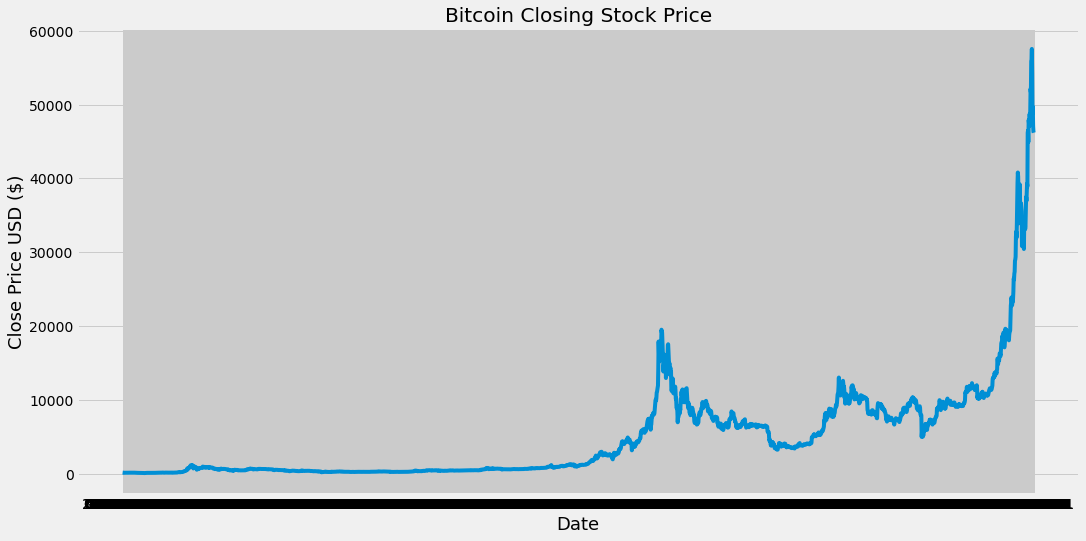

In [4]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Bitcoin Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [5]:
data.shape

(2862, 9)

In [6]:
btc=data.filter(["Close"])

In [7]:
dataset=btc.values

In [8]:
train_data_len=math.ceil(len(dataset) *.8)
train_data_len

2290

In [9]:
scaler = MinMaxScaler(feature_range= (0,1))
scale_data=scaler.fit_transform(dataset)

In [10]:
train_data = scale_data[0:train_data_len,:]

In [11]:
x_train = []
y_train = []
for i in range (80,len(train_data)):
  x_train.append(train_data[i-80:i,0])
  y_train.append (train_data[i,0])
  if i<=81:
    print(x_train)
    print(y_train)
    print()

[array([1.32430834e-03, 1.22791275e-03, 8.44940389e-04, 6.39969265e-04,
       5.10165820e-04, 7.66814723e-04, 8.26148469e-04, 7.63334738e-04,
       7.49414797e-04, 7.85432643e-04, 7.69772710e-04, 8.48594373e-04,
       8.14490519e-04, 8.10314537e-04, 8.62166315e-04, 7.49414797e-04,
       7.96742595e-04, 8.75738257e-04, 9.49687941e-04, 9.58213905e-04,
       9.31940017e-04, 9.32114016e-04, 9.47425951e-04, 9.64999876e-04,
       1.01389367e-03, 1.12699318e-03, 1.10576527e-03, 1.13186516e-03,
       1.06678944e-03, 1.05391350e-03, 1.11133325e-03, 1.05043351e-03,
       1.05391350e-03, 1.05913347e-03, 9.37159995e-04, 9.35942000e-04,
       9.22022059e-04, 9.26024042e-04, 8.62514314e-04, 7.49414797e-04,
       6.93735035e-04, 5.49315652e-04, 6.59805180e-04, 7.04174990e-04,
       6.91125046e-04, 6.18915355e-04, 5.48967654e-04, 5.49141653e-04,
       5.40789689e-04, 5.78895526e-04, 6.78075102e-04, 6.92865039e-04,
       7.25924897e-04, 7.14614946e-04, 6.93735035e-04, 6.81555087e-04,
     

In [12]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [13]:
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1 ))
x_train.shape

(2210, 80, 1)

In [14]:
model =Sequential()
model.add(LSTM(70, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(70, return_sequences=False))
model.add(Dense(35))
model.add(Dense(1))

In [15]:
model.compile(optimizer= 'rmsprop', loss='mean_squared_error')

In [16]:
model.fit(x_train, y_train, batch_size=1, epochs =20 )

Epoch 1/20
2210/2210 [==============================] - 133s 55ms/step - loss: 5.5205e-04
Epoch 2/20
2210/2210 [==============================] - 134s 61ms/step - loss: 1.4946e-04
Epoch 3/20
2210/2210 [==============================] - 134s 61ms/step - loss: 1.0178e-04
Epoch 4/20
2210/2210 [==============================] - 132s 60ms/step - loss: 6.6607e-05
Epoch 5/20
2210/2210 [==============================] - 126s 57ms/step - loss: 6.1871e-05
Epoch 6/20
2210/2210 [==============================] - 132s 60ms/step - loss: 5.4890e-05
Epoch 7/20
2210/2210 [==============================] - 136s 62ms/step - loss: 5.9198e-05
Epoch 8/20
2210/2210 [==============================] - 134s 61ms/step - loss: 5.0807e-05
Epoch 9/20
2210/2210 [==============================] - 128s 58ms/step - loss: 4.8129e-052s - loss: 
Epoch 10/20
2210/2210 [==============================] - 136s 62ms/step - loss: 4.8172e-05
Epoch 11/20
2210/2210 [==============================] - 135s 61ms/step - loss: 4.4015e-

In [17]:
test_data = scale_data[train_data_len-80: , :]
x_test = []
y_test = dataset[train_data_len:, :]
for i in range (80, len(test_data)):
  x_test.append(test_data[i-80:i,0])

In [18]:
x_test= np.array(x_test)

In [19]:
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [20]:
predictions = model.predict (x_test)
predictions = scaler.inverse_transform(predictions)

In [20]:
rmse = np.sqrt(np.mean(predictions -y_test)**2)
rmse

63.71436055643576

In [21]:
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions 

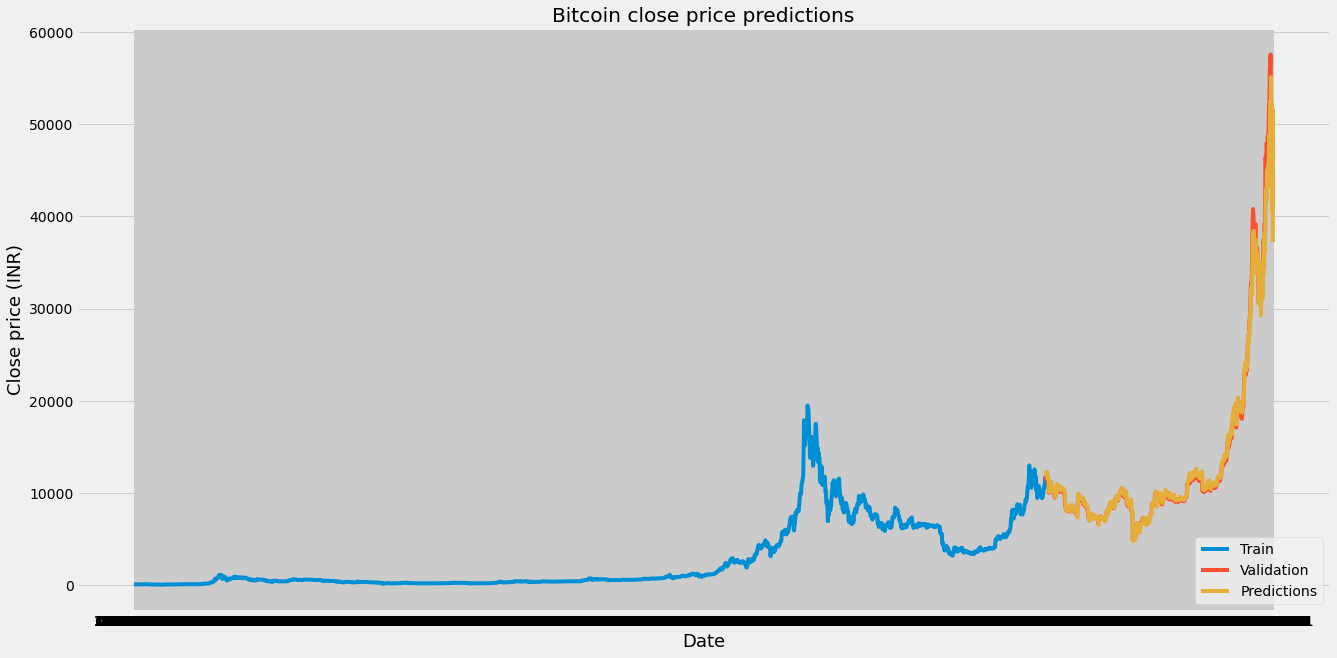

In [22]:
plt.figure(figsize=(20,10))
plt.title('Bitcoin close price predictions')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price (INR)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()

# LSTM Ethereum


In [23]:
data_1 = pd.read_csv("eth daily data.csv")
data_1.set_index('Date', drop=True, inplace=True)
data_1.head()

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
08-08-2015,1,Ethereum,ETH,2.798810,0.714725,2.793760,0.753325,674188,45486894.24
09-08-2015,2,Ethereum,ETH,0.879810,0.629191,0.706136,0.701897,532170,42399573.50
10-08-2015,3,Ethereum,ETH,0.729854,0.636546,0.713989,0.708448,405283,42818364.39
11-08-2015,4,Ethereum,ETH,1.131410,0.663235,0.708087,1.067860,1463100,64569288.43
12-08-2015,5,Ethereum,ETH,1.289940,0.883608,1.058750,1.217440,2150620,73645010.99


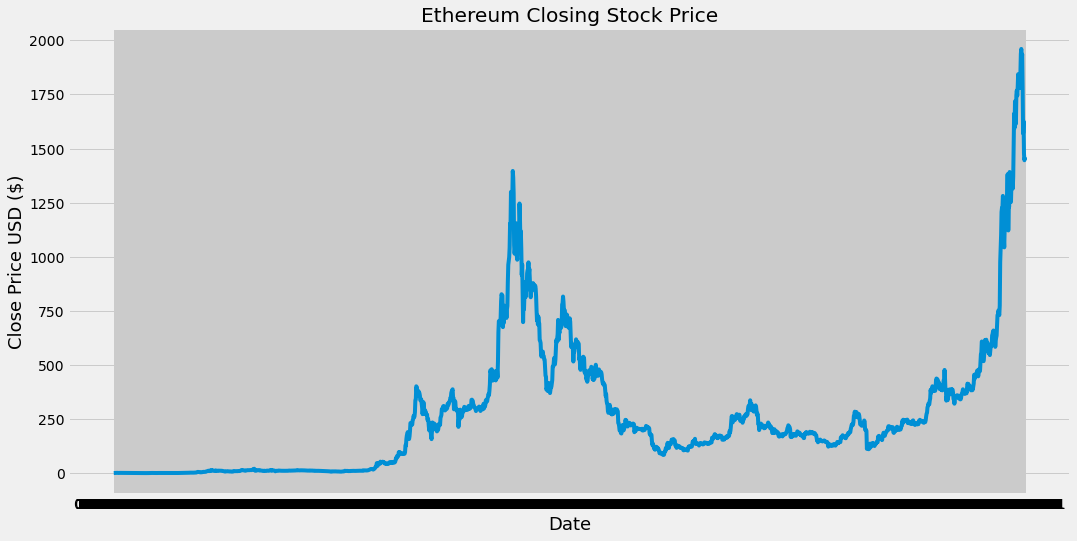

In [24]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Ethereum Closing Stock Price")
plt.plot(data_1["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [25]:
data_1.shape

(2031, 9)

In [26]:
eth=data_1.filter(["Close"])

In [27]:
dataset=eth.values

In [28]:
train_data_len=math.ceil(len(dataset) *.8)
train_data_len

1625

In [29]:
scaler = MinMaxScaler(feature_range= (0,1))
scale_data=scaler.fit_transform(dataset)

In [30]:
train_data = scale_data[0:train_data_len,:]

In [31]:
x_train = []
y_train = []
for i in range (80,len(train_data)):
  x_train.append(train_data[i-80:i,0])
  y_train.append (train_data[i,0])
  if i<=81:
    print(x_train)
    print(y_train)
    print()

[array([1.62520349e-04, 1.36277977e-04, 1.39620768e-04, 3.23019517e-04,
       3.99346362e-04, 7.10731091e-04, 7.10833163e-04, 6.39920321e-04,
       5.77222922e-04, 3.92289233e-04, 3.32811659e-04, 4.20481919e-04,
       5.25629088e-04, 4.90098667e-04, 4.81903663e-04, 4.68309924e-04,
       4.06403430e-04, 3.59927663e-04, 3.70026021e-04, 3.63759796e-04,
       3.86048619e-04, 3.81542860e-04, 4.51307607e-04, 4.71192997e-04,
       4.67809845e-04, 4.38816097e-04, 4.23579294e-04, 4.28416694e-04,
       4.61278344e-04, 4.39346773e-04, 4.14251463e-04, 4.12098100e-04,
       3.93769032e-04, 3.72980507e-04, 2.79706395e-04, 3.08160343e-04,
       2.55736277e-04, 2.24925370e-04, 2.60026152e-04, 2.41026074e-04,
       2.24215582e-04, 2.13731505e-04, 2.28379419e-04, 2.56982338e-04,
       2.47084048e-04, 2.38281297e-04, 2.34000090e-04, 1.93282256e-04,
       1.53793634e-04, 1.79175208e-04, 1.45943594e-04, 7.55496882e-05,
       1.15483765e-04, 1.55029019e-04, 1.30316935e-04, 1.24376848e-04,
     

In [32]:
x_train, y_train= np.array(x_train), np.array(y_train)

In [33]:
x_train=np.reshape(x_train,(x_train.shape[0], x_train.shape[1], 1 ))
x_train.shape

(1545, 80, 1)

In [34]:
model =Sequential()
model.add(LSTM(70, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(70, return_sequences=False))
model.add(Dense(35))
model.add(Dense(1))

In [35]:
model.compile(optimizer= 'rmsprop', loss='mean_squared_error')

In [36]:
model.fit(x_train, y_train, batch_size=1, epochs =20 )

Epoch 1/20
1545/1545 [==============================] - 89s 52ms/step - loss: 0.0020 0s - los
Epoch 2/20
1545/1545 [==============================] - 83s 54ms/step - loss: 5.4828e-04
Epoch 3/20
1545/1545 [==============================] - 87s 56ms/step - loss: 3.2487e-04
Epoch 4/20
1545/1545 [==============================] - 72s 47ms/step - loss: 3.5922e-04
Epoch 5/20
1545/1545 [==============================] - 68s 44ms/step - loss: 2.6874e-04
Epoch 6/20
1545/1545 [==============================] - 41s 27ms/step - loss: 3.0415e-04 0s - loss
Epoch 7/20
1545/1545 [==============================] - 44s 28ms/step - loss: 2.3425e-04
Epoch 8/20
1545/1545 [==============================] - 48s 31ms/step - loss: 2.2833e-04
Epoch 9/20
1545/1545 [==============================] - 47s 31ms/step - loss: 2.5793e-04
Epoch 10/20
1545/1545 [==============================] - 58s 37ms/step - loss: 2.2128e-04
Epoch 11/20
1545/1545 [==============================] - 62s 40ms/step - loss: 2.3589e-04
Epoc

In [37]:
test_data = scale_data[train_data_len-80: , :]
x_test = []
y_test = dataset[train_data_len:, :]
for i in range (80, len(test_data)):
  x_test.append(test_data[i-80:i,0])

In [38]:
x_test= np.array(x_test)

In [39]:
x_test =np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [40]:
predictions = model.predict (x_test)
predictions = scaler.inverse_transform(predictions)

In [21]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

160.71278473967436

In [42]:
train = data_1[:train_data_len]
valid = data_1[train_data_len:]
valid['Predictions'] = predictions 

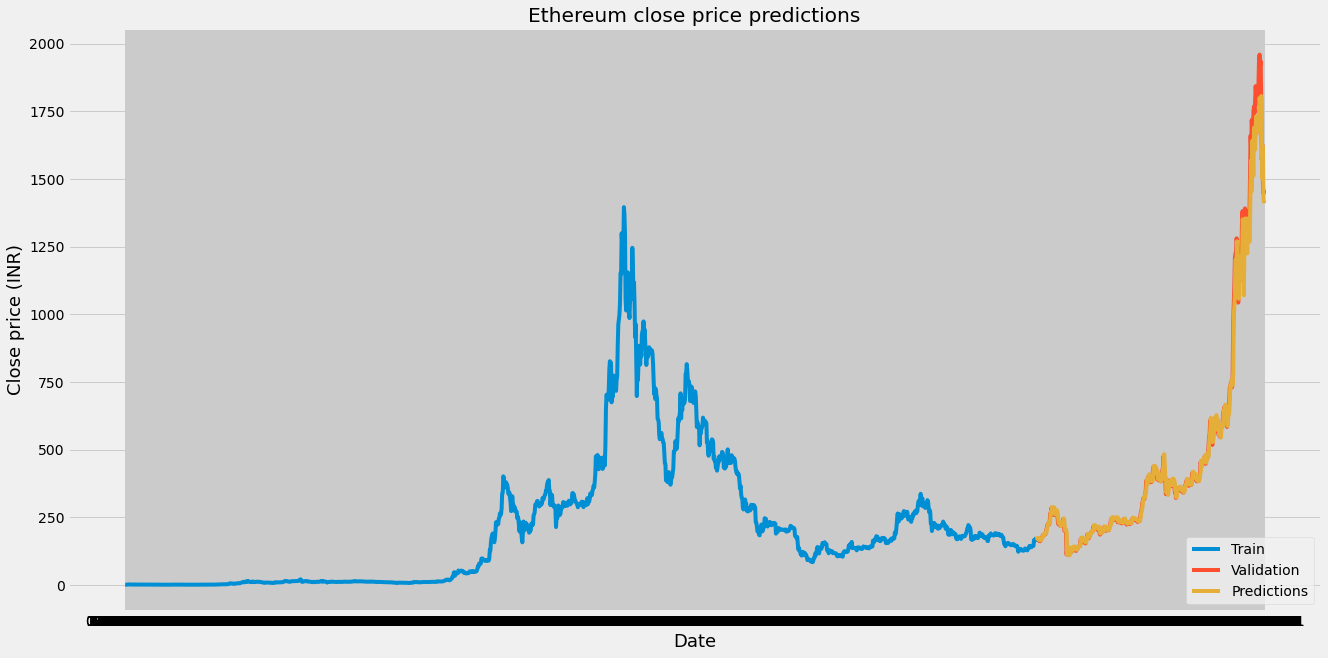

In [43]:
plt.figure(figsize=(20,10))
plt.title('Ethereum close price predictions')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close price (INR)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'lower right')
plt.show()